<a href="https://colab.research.google.com/github/HSE-LAMBDA/MLDM-2020/blob/master/day-01/MLDM_2020_seminar01_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get the Titanic dataset:

In [1]:
import pandas as pd
data = pd.read_csv("train.csv", index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### About the data
Here's some of the columns
* Name - a string with person's full name
* Survived - 1 if a person survived the shipwreck, 0 otherwise.
* Pclass - passenger class. Pclass == 3 is cheap'n'cheerful, Pclass == 1 is for moneybags.
* Sex - a person's gender
* Age - age in years, if available
* SibSp - number of siblings on a ship
* Parch - number of parents on a ship
* Fare - ticket cost
* Embarked - port where the passenger embarked
 * C = Cherbourg; Q = Queenstown; S = Southampton

## Task 1 (1 point)

In [2]:
# Compute survaval rate for each of the three passenger classes (`Pclass` = 1, 2 and 3)
# (can you do it using groupby?)

groups_of_survivors_by_class = data.groupby('Pclass')

for group in groups_of_survivors_by_class:
    print("Pclass ", "Survival Rate")
    print(group[0], group[1].Survived.mean())
    print()

Pclass  Survival Rate
1 0.6296296296296297

Pclass  Survival Rate
2 0.47282608695652173

Pclass  Survival Rate
3 0.24236252545824846



## Task 2 (1 point)

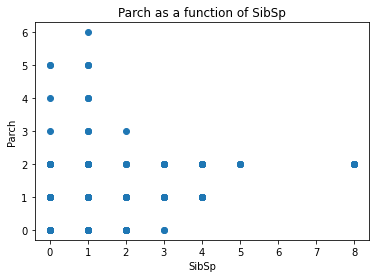

In [3]:
# Plot the average number of parents onboard (`Parch`) as a function of the 
# number of siblings onboard (`SibSp`)

import matplotlib.pyplot as plt

plt.scatter(x=data['SibSp'], y=data['Parch'])
plt.title("Parch as a function of SibSp")
plt.xlabel("SibSp")
plt.ylabel("Parch")
plt.show()

## Task 3 (2 points)

In [4]:
# Build a model with KNeighborsClassifier to get the accuracy of
# at least 0.75 on the validation part of the dataset

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


def feature_selection_and_preprocessing(dataset):
    dataset['Age'] = dataset['Age'].fillna(value=dataset['Age'].mean())
    data_extended = pd.concat([
                      dataset,
                      pd.get_dummies(dataset.Embarked, prefix='Embarked'),
                      pd.get_dummies(dataset.Sex, prefix='Sex')
                    ], axis=1)
    features = data_extended[["Fare", "Parch", "Sex_male", 
                              "Sex_female", "Embarked_C", "Embarked_Q",
                              "Embarked_S", "Age", "SibSp"]].copy()
    features["Fare"] /= features["Fare"].mean()

    features['Fare'] *= 1
    return features

model = KNeighborsClassifier(
    n_neighbors=5
)


# Validation code (do not touch)
data = pd.read_csv("train.csv", index_col='PassengerId')
data_train = data.iloc[:-100]
data_test = data.iloc[-100:]

model.fit(
    feature_selection_and_preprocessing(
        data_train.drop('Survived', axis=1)
    ),
    data_train['Survived']
)

test_predictions = model.predict(
    feature_selection_and_preprocessing(
        data_test.drop('Survived', axis=1)
    )
)
print("Test accuracy:", accuracy_score(
    data_test['Survived'],
    test_predictions
))

Test accuracy: 0.84


## Task 4 (2 points)

Check how your model from the previous task performs on randomized splits to train / test (with test set of size 100). Plot the histogram of the test error distribution.

*Hint: check sklearn's `sklearn.model_selection.train_test_split` function.*

In [5]:
# Assumptions 
"""
Number of random splits --- 1000
test_size --- 100
"""
from sklearn.model_selection import train_test_split

df = data.copy()
X = feature_selection_and_preprocessing(
        df.drop('Survived', axis=1)
    )

y = df['Survived']

test_accuracy = []
for split in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=100)

    model.fit(X_train, y_train)

    test_predictions = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, test_predictions)
    
    test_accuracy.append(accuracy)

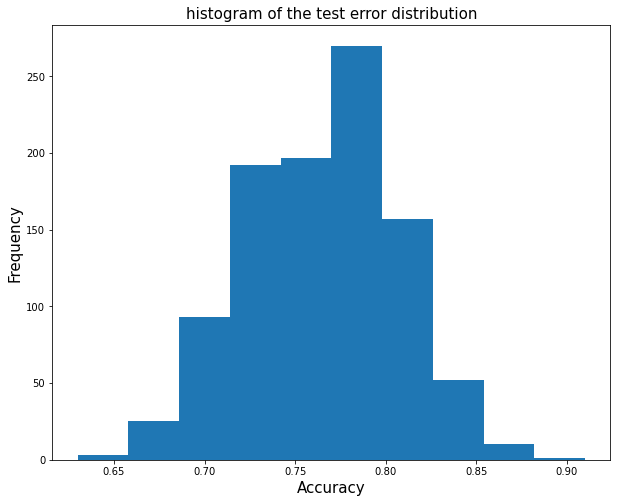

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[10,8])
plt.xlabel('Accuracy',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('histogram of the test error distribution',fontsize=15)
plt.hist(test_accuracy)
plt.show()